In [57]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [58]:
train = pd.read_csv('./downloads/train.csv')
test = pd.read_csv('./downloads/test.csv')
train.head()

,id,date,speed
0,0,1/1/2017 0:00,43.002930
1,1,1/1/2017 1:00,46.118696
2,2,1/1/2017 2:00,44.294158
3,3,1/1/2017 3:00,41.067468
4,4,1/1/2017 4:00,46.448653


In [59]:
train.isnull().sum(axis = 0)

id       0
date     0
speed    0
dtype: int64

In [60]:
test.isnull().sum(axis = 0)

id      0
date    0
dtype: int64

In [61]:
trset=train.copy()
trset.drop('id',axis=1,inplace=True)
trset['year']=trset['date'].apply(lambda y:int(y.split()[0].split('/')[2]))
trset['month']=trset['date'].apply(lambda m:int(m.split()[0].split('/')[1]))
trset['day']=trset['date'].apply(lambda d:int(d.split()[0].split('/')[0]))
trset['time']=trset['date'].apply(lambda t:int(t.split()[1].split(':')[0]))
trset['datetime']=trset['date'].apply(lambda x:
            datetime.datetime(  int(x.split()[0].split('/')[2]),
                int(x.split()[0].split('/')[1]),
                int(x.split()[0].split('/')[0]),
                int(x.split()[1].split(':')[0])  )
                                           )
trset['IsWeekend']=trset['datetime'].apply(lambda x:0 if x.weekday() in [0,1,2,3,4] else 1)

ttset=test.copy()

ttset['year']=trset['date'].apply(lambda y:int(y.split()[0].split('/')[2]))
ttset['month']=trset['date'].apply(lambda m:int(m.split()[0].split('/')[1]))
ttset['day']=trset['date'].apply(lambda d:int(d.split()[0].split('/')[0]))
ttset['time']=trset['date'].apply(lambda t:int(t.split()[1].split(':')[0]))
ttset['datetime']=trset['date'].apply(lambda x:
            datetime.datetime(  int(x.split()[0].split('/')[2]),
                int(x.split()[0].split('/')[1]),
                int(x.split()[0].split('/')[0]),
                int(x.split()[1].split(':')[0])  )
                                           )
ttset['IsWeekend']=trset['datetime'].apply(lambda x:0 if x.weekday() in [0,1,2,3,4] else 1)
trset.head()
ttset.head()

,id,date,year,month,day,time,datetime,IsWeekend
0,0,1/1/2018 2:00,2017,1,1,0,2017-01-01 00:00:00,1
1,1,1/1/2018 5:00,2017,1,1,1,2017-01-01 01:00:00,1
2,2,1/1/2018 7:00,2017,1,1,2,2017-01-01 02:00:00,1
3,3,1/1/2018 8:00,2017,1,1,3,2017-01-01 03:00:00,1
4,4,1/1/2018 10:00,2017,1,1,4,2017-01-01 04:00:00,1


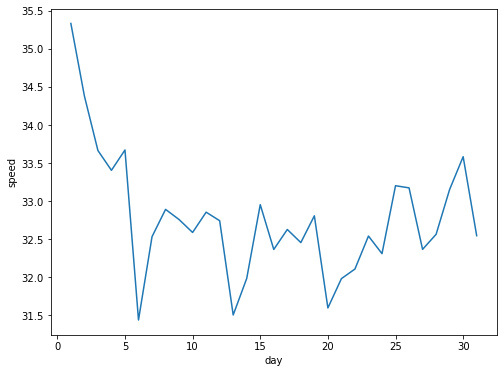

In [62]:
tm = trset.groupby('day').aggregate({'speed':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x=tm.index,y=tm.speed,data=tm,palette="Set2")
plt.show()

In [63]:
trset = trset.drop('datetime',axis = 1)
trset = trset.drop('date',axis = 1)
ttset = ttset.drop('datetime',axis = 1)
ttset = ttset.drop('date',axis = 1)
trset.head()
ttset.head()

,id,year,month,day,time,IsWeekend
0,0,2017,1,1,0,1
1,1,2017,1,1,1,1
2,2,2017,1,1,2,1
3,3,2017,1,1,3,1
4,4,2017,1,1,4,1


In [64]:
#target=['speed']
#cat_vars=['IsWeekend']
#num_vars=['year','month','day','time']
if __name__ == "__main__":
    label = trset["speed"].astype("float64")
    trfeature = trset.drop(["speed"], axis=1)

    model = xgb.XGBRegressor(max_depth=7, learning_rate=0.3, n_estimators=160)
    model.fit(trfeature, label)

    test_id = ttset["id"]
    
    loss = mean_squared_error(label, model.predict(trfeature))
    print(loss)
    ttset.drop('id',axis=1,inplace=True)
    #print(ttset.head())
    predict = model.predict(ttset)

    result_len = len(predict)
    #test_id = ttset["id"]
    prediction_result = []
    for row in range(0, result_len):
        prediction_result.append([int(test_id[row]), predict[row]])
    np_data = np.array(prediction_result)

    pd_data = pd.DataFrame(np_data, columns=['id', 'speed'])
    pd_data.id = pd_data.id.apply(int)
    # print(pd_data)
    pd_data.to_csv('./5012 NOTEBOOKS/result.csv', index=None)

5.99926267720041
